In [ ]:
%load_ext autoreload
%autoreload 2

In [11]:
from stable_baselines3 import PPO
import torch as th
from environment import RNAInvEnvironment
from matplotlib import pyplot as plt
import numpy as np
import RNA

In [40]:
model = PPO.load('models/embiddings_simple_bandit/best_model.zip')

In [54]:
objective_structure = '(((((((....(((...........)))((((((((..(((((((((((((((((((...(((((......))))).)))))).)))))))))))))..))))))))..)))))))'

env = RNAInvEnvironment(
    objective_structure=objective_structure,
    max_steps=1,
    tuple_obs_space=True,
    policy=policy
)


/opt/tljh/user/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [55]:
solutions = [
    'CCUAGGGGAGCAGAUUACAUACCCUUCUUUAGGCUGCGCGGGGUUUUACCUGCAUAUGAAAUUCGACUGCACGGGUGAUGUGCGGGGUAAGGCUUUGAUCAGUUUGAAACCCUGGG',
    'UUGGUGGAUAAGGUUUGCGAAAAAUGCCCUAUUAGGGUAUGGUUCUAGUCAGUGCUUGAAGUUGUGCACUGGCAAUAAAGUACAUGAUUAGAGCCAUUGCCUAAUAGAACCAUUGA'
]

In [67]:
def policy(obs, deterministic=True):
    action, _ = model.predict(obs, deterministic=deterministic)
    return action

In [71]:
obs = env.reset()
energies = []
use_model = False
states = {}
for i in range(10_000):
    if use_model:
        obs = env.reset()
        action = policy(obs)
        state = env.action_to_state(action)
    else:
        _ = env.reset()
        state = env.state
    if state in states:
        struct = states[state]
        print('Already calculated')
    else:
        struct, _ = RNA.fold(state)
        states[state] = struct
    if struct == objective_structure:
        print(state)

In [70]:
len(states)

10000

In [39]:
# np.min(energies), np.max(energies)

In [6]:
env = RNAInvEnvironment(objective_structure=objective_structure, max_steps=1, tuple_obs_space=True)
obs = env.reset()
done = False
energy_rewards = []
i = 0
while not done:
    i = i + 1
    action = model.predict(obs, deterministic=False)[0]
    state, energy_reward, done, info = env.step(action)
    energy_rewards.append(energy_reward)
    print(f'\r{i}, {np.sum(energy_rewards)}', end='')

/opt/tljh/user/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


ValueError: Error: Unexpected observation shape (116,) for Box environment, please use (389,) or (n_env, 389) for the observation shape.

In [290]:
np.mean(energy_rewards)*512, np.max(energy_rewards), np.min(energy_rewards)

(30.90000057220459, 52.899999141693115, -49.50000190734863)

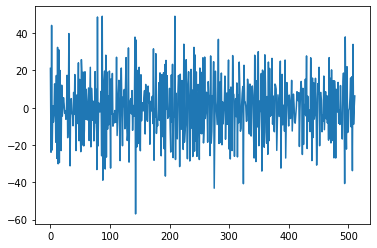

In [283]:
plt.plot(energy_rewards)

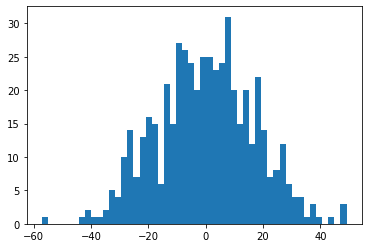

In [286]:
_ = plt.hist(energy_rewards, bins=50)

In [271]:
np.sum(energy_rewards), len(energy_rewards)

(-8.09999942779541, 512)

In [247]:
energy_reward

11.30000114440918

In [213]:
state

[0,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 1,
 0,
 1,
 0,
 1,
 3,
 1,
 2,
 3,
 0,
 0,
 1,
 1,
 3,
 1,
 3,
 1,
 0,
 1,
 3,
 3,
 0,
 2,
 1,
 3,
 1,
 3,
 3,
 0,
 0,
 2,
 0,
 0,
 3,
 0,
 3,
 3,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 1,
 3,
 1,
 1,
 2,
 3,
 0,
 0,
 3,
 3,
 0,
 1,
 2,
 1,
 3,
 0,
 2,
 2,
 3,
 3,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 3,
 1,
 2,
 1,
 0,
 1,
 3,
 1,
 3,
 2,
 1,
 3,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 3,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 3,
 2,
 3,
 3,
 3,
 0,
 0,
 3,
 2,
 1,
 0,
 3,
 2,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 3,
 3,
 2,
 3,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 3,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 3,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 3,
 1,
 0,
 3,
 1,
 1,
 2,
 0,
 0,
 1,
 3,
 2,
 0,
 2,
 3,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 3,
 2,
 3,
 3,
 1,
 3,
 0,
 1,
 2,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 1,
 2,
 2,
 3,
 2,
 3,


In [158]:
model.policy.features_extractor

EmbeddinsFeatureExtractor(
  (base_embeding): Embedding(4, 2)
  (linear_1): Sequential(
    (0): Linear(in_features=778, out_features=256, bias=True)
    (1): ReLU()
  )
)

In [162]:

embedding_layer

Embedding(4, 2)

In [6]:
list(emb_pair.parameters())

[Parameter containing:
 tensor([[ 0.3127,  0.3601],
         [-0.7216, -0.0172],
         [ 1.2569, -1.9309],
         [-0.3089,  0.4396],
         [-0.7665, -0.3653],
         [-0.8550,  0.0921],
         [-1.0149,  0.2923]], device='cuda:0', requires_grad=True)]

In [7]:
emb_base = model.policy.features_extractor.embeding_layers[7]

In [8]:
list(emb_base.parameters())

[Parameter containing:
 tensor([[ 0.8760, -1.0264],
         [ 0.5544,  0.0244],
         [-0.3744,  1.0642],
         [-1.1017, -0.6482],
         [ 0.5527,  0.0635]], device='cuda:0', requires_grad=True)]

In [9]:
emb_pair(th.as_tensor([0, 1, 2, 3, 4, 5, 6]).cuda())

tensor([[ 0.3127,  0.3601],
        [-0.7216, -0.0172],
        [ 1.2569, -1.9309],
        [-0.3089,  0.4396],
        [-0.7665, -0.3653],
        [-0.8550,  0.0921],
        [-1.0149,  0.2923]], device='cuda:0', grad_fn=<EmbeddingBackward>)

In [10]:
emb_base(th.as_tensor([0, 1, 2, 3, 4]).cuda())

tensor([[ 0.8760, -1.0264],
        [ 0.5544,  0.0244],
        [-0.3744,  1.0642],
        [-1.1017, -0.6482],
        [ 0.5527,  0.0635]], device='cuda:0', grad_fn=<EmbeddingBackward>)

In [15]:
objective_structure = '(((((((....(((...........)))((((((((..(((((((((((((((((((...(((((......))))).)))))).)))))))))))))..))))))))..)))))))'

env = RNAInvEnvironment(objective_structure=objective_structure, max_steps=100, tuple_obs_space=True)

/opt/tljh/user/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [156]:
print(env.reset())

[1, 1, 3, 0, 0, 0, 2, 3, 3, 0, 3, 1, 1, 0, 1, 1, 3, 2, 3, 2, 2, 3, 2, 1, 0, 1, 2, 2, 3, 1, 1, 3, 0, 1, 0, 2, 0, 0, 3, 2, 3, 1, 1, 3, 0, 2, 0, 1, 2, 2, 0, 1, 3, 2, 1, 3, 3, 3, 1, 3, 0, 2, 0, 1, 3, 2, 2, 3, 0, 0, 3, 0, 2, 3, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 2, 1, 1, 3, 2, 3, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2]


In [153]:
env.sample_random_action()

'AGAAGCUCAUGAUCUCCAAUGGGAUGGUAACUUCACGUAGUAGACUUUCUCGGAUGGGCAUCGUGCGAGGGCACGACUCAUCUGGGGAAAGUCUACUGCGUGGGGUUUAAGUUUUU'

In [154]:
obs

NameError: name 'obs' is not defined